<a href="https://colab.research.google.com/github/balezz/modern_dl/blob/main/KerasTrainSaveModelAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

In [30]:
model = K.Sequential()
model.add(K.Input(shape=(32,32,3)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(64))
model.add(K.layers.Dense(10, activation='softmax'))

In [31]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.8e-3)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [22]:
type(X_train)

numpy.ndarray

In [52]:
y_train_sparse = K.utils.to_categorical(y_train, num_classes=10)
import time
tic = time.time()
history = model.fit(x=X_train, y=y_train_sparse, batch_size=32, epochs=4,
           verbose=1, validation_split=0.2)
tac = time.time()
print(tac - tic)

Epoch 1/4
1250/1250 [==============================] - 7s 5ms/step - loss: 2.1665 - accuracy: 0.3136 - val_loss: 2.5879 - val_accuracy: 0.2815
Epoch 2/4
1250/1250 [==============================] - 6s 5ms/step - loss: 6.2207 - accuracy: 0.3272 - val_loss: 1.8631 - val_accuracy: 0.3436
Epoch 3/4
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8867 - accuracy: 0.3571 - val_loss: 2.6790 - val_accuracy: 0.2500
Epoch 4/4
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2796 - accuracy: 0.3064 - val_loss: 2.9407 - val_accuracy: 0.3136
41.3638813495636


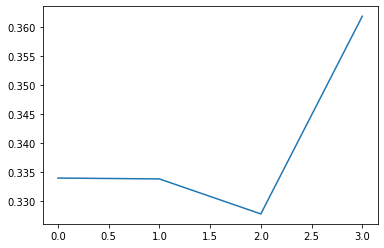

In [43]:
plt.plot(history.history['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_test_sparse = K.utils.to_categorical(y_test, num_classes=10)
model.evaluate(X_test, y_test_sparse, return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 2.0640 - accuracy: 0.3086


{'accuracy': 0.3086000084877014, 'loss': 2.0639545917510986}

In [47]:
y_pred = model.predict(X_test[:20])

In [49]:
y_pred.shape

(20, 10)

In [50]:
model.train_on_batch(X_train[:32], y_train_sparse[:32])

[2.0633137226104736, 0.3084130883216858]

In [55]:
model.save('model.h5')

In [56]:
del(model)

In [58]:
model = K.models.load_model('model.h5')

In [60]:
model.evaluate(X_test, y_test_sparse, return_dict=True)

313/313 [==============================] - 1s 2ms/step - loss: 2.0273 - accuracy: 0.3160


{'accuracy': 0.3160000145435333, 'loss': 2.027273416519165}